In [3]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats as stats

C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
az.style.use('arviz-darkgrid')

In [29]:
ways = np.array([0 ,3, 8, 9])

In [30]:
ways = ways/ways.sum()

In [31]:
ways

array([0.  , 0.15, 0.4 , 0.45])

In [32]:
stats.binom.pmf(6, 9, p=0.8)

0.17616076799999994

In [33]:
#define grid
grid = np.linspace(0,1,20)

In [34]:
#define prior
prior = np.repeat(1,20)

In [35]:
#compute likelihood of each value of the grid
likelihood = stats.binom.pmf(6,9,grid)

In [36]:
#compute product of likelihood and prior
posterior = likelihood*prior

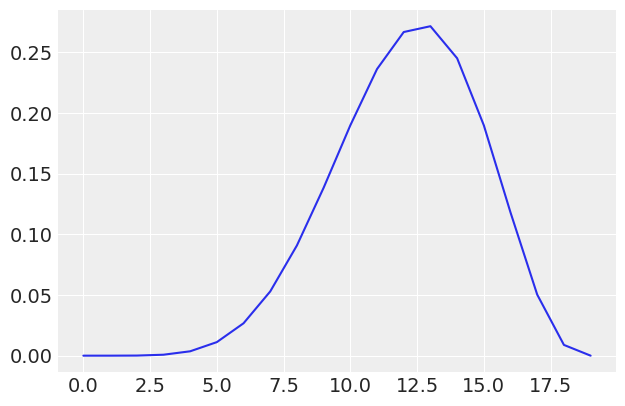

In [37]:
plt.plot(posterior)

# Build function for grid approximation

In [79]:
def binom_grid_approximation(w,n,gridpoints,prior):
    grid = np.linspace(0,1,gridpoints)
    likelyhood = stats.binom.pmf(w,n,grid)
    posterior = likelyhood * prior /(likelyhood*prior).sum()
    return grid, posterior

In [149]:
coarse_grid, coarse_posterior = binom_grid_approximation(6,9,5,np.repeat(1,5))

In [150]:
fine_grid, fine_posterior = binom_grid_approximation(6,9,100,np.repeat(1,100))

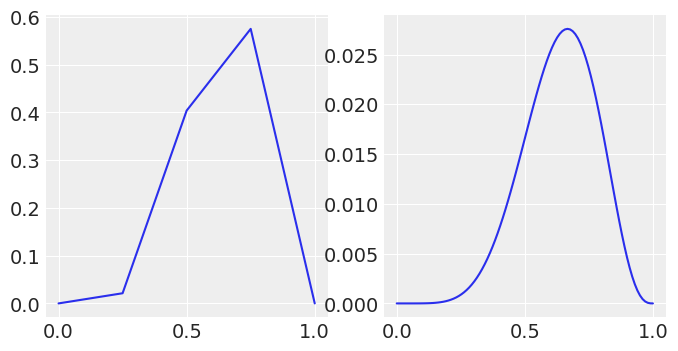

In [140]:
_,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(coarse_grid, coarse_posterior)
ax[1].plot(fine_grid, fine_posterior)

# Test different priors

In [155]:
prior2 = np.repeat(1,100)

In [157]:
for i in np.arange(50):
    prior2[i] = 0

In [158]:
test2 = binom_grid_approximation(6,9,100,prior2)

In [177]:
prior3=np.exp(-5*np.abs(np.linspace(0,1,100)-0.5))

In [178]:
test3 = binom_grid_approximation(6,9,100,prior3)

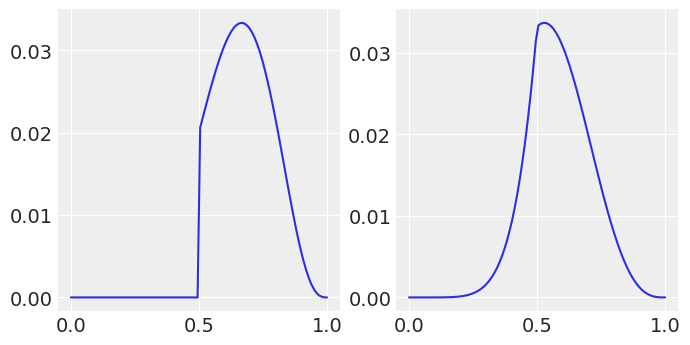

In [179]:
_,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(test2[0], test2[1])
ax[1].plot(test3[0], test3[1])

In [181]:
data = np.repeat((0,1),(3,6))

In [189]:
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data) , p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars = [p]))**0.5)[0]
mean_q['p'], std_q

C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 178.42it/s]


(array(0.66666667), array([0.15713484]))

In [199]:
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p']+std_q*z
pi

array([0.41553484, 0.91779849])

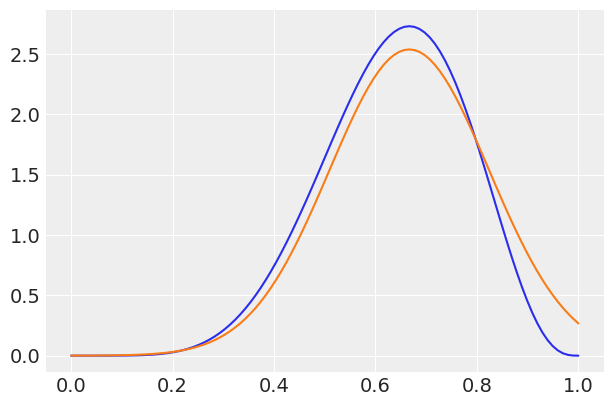

In [212]:
#analytical calculation
w,n = 6,9
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, w+1, n-w+1), 
         label = 'True Posterior')
#quadratic approximation
plt.plot(x,stats.norm.pdf(x,mean_q['p'],std_q),
        label = 'Quadratic Approximation')


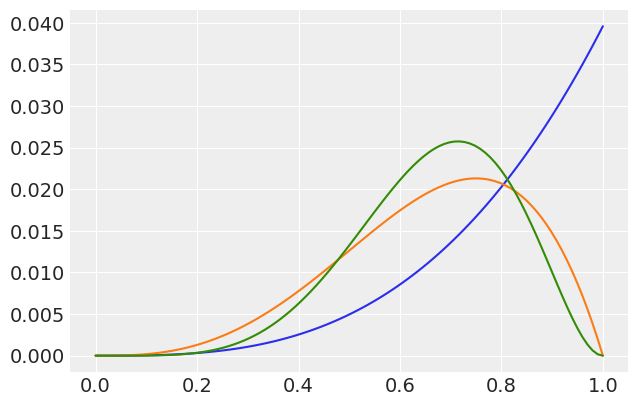

In [228]:
a=binom_grid_approximation(3,3,100,np.repeat(1,100))
b=binom_grid_approximation(3,4,100,np.repeat(1,100))
c=binom_grid_approximation(5,7,100,np.repeat(1,100))
plt.plot(a[0],a[1])
plt.plot(b[0],b[1])
plt.plot(c[0],c[1])

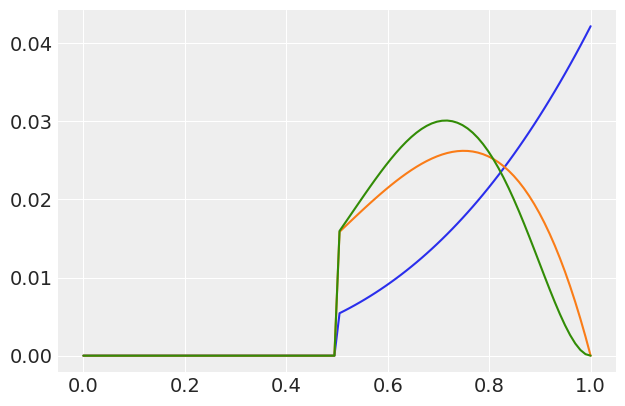

In [229]:
a=binom_grid_approximation(3,3,100,np.repeat((0,1),(50,50)))
b=binom_grid_approximation(3,4,100,np.repeat((0,1),(50,50)))
c=binom_grid_approximation(5,7,100,np.repeat((0,1),(50,5)))
plt.plot(a[0],a[1])
plt.plot(b[0],b[1])
plt.plot(c[0],c[1])

In [230]:
np.repeat((0,1),(10,10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# probability of earth given that we find land

$$ Pr(Earth \mid land) = \frac{Pr(land \mid Earth)Pr(Earth)}{Pr(land)} $$

$$ Pr(land) = Pr(land \mid Earth) Pr(Earth) + Pr(land \mid Mars) Pr(Mars)$$

In [1]:
0.3*0.5/(0.3*0.5+1*0.5)

0.23076923076923075

        1            2           3

        2            1           0

2:1
2/3  

        1            2           3           4
        2            1           0           2

4:1 4/5

    BB            BW                 WW

    1               2                  3

    x               x                  x

    2               1                  0

    50%            50%

       BB             BW                   WW
   
       2              1                    0
   
     BW  WW         BB   WW
     1    2         0     2
 
     2    4               2

    6:2 = 3:1   3/4 BB

## Hard questions

       50%                 50%
        A                   B
    90%   10%          80%    20%
             10%                 20%
    

$$ Pr(2 twins) = Pr(A) Pr(twins \mid A) Pr(twins \mid A) + Pr(B) Pr(twins \mid B)  Pr(twins \mid B) $$

In [10]:
a = 0.5*0.1*0.1 + 0.5* 0.2*0.2

$$ Pr(twins) = Pr(twins\mid A)Pr(A) + Pr(twins \mid B)Pr(B)$$

In [11]:
b = 0.5*0.1 + 0.5*0.2

In [12]:
a/b

0.16666666666666669

$$ Pr(twins \mid A) = \frac{Pr(A \mid twins) Pr(twins)}{Pr(A)} $$

$$ Pr(A \mid twins) = \frac{Pr(twins \mid A)Pr(A)}{Pr(twins)}$$

In [15]:
a = 0.1 * 0.5/(0.5*0.1+0.5*0.2)
a

0.3333333333333333

$$ Pr(B \mid twins) = \frac{Pr(twins \mid B)Pr(B)}{Pr(twins)}$$

In [18]:
b = 0.2 * 0.5/(0.5*0.1+0.5*0.2)
b

0.6666666666666666

$$ Pr(A \mid twins) Pr(not twins \mid A) $$

In [20]:
a = 1/3 * 0.9

$$ Pr(B \mid twins) Pr(nottwins \mid B) $$

In [21]:
b = 2/3 * 0.8

In [22]:
a/(a+b)

0.36000000000000004

$$ Pr( Test A \mid A )  = 0.8$$ 

$$ Pr( TestA \mid B ) = 0.35 $$

In [23]:
0.5*0.8/(0.5*0.8+0.5*0.35)

0.6956521739130436

$$ Pr(A \mid TestA) = \frac{Pr(TestA \mid A) Pr(A)}{Pr(TestA)}$$

$$ Pr(TestA) = Pr(TestA \mid A)Pr(A) + Pr(Test A \mid B) Pr(B)$$

$$ Pr(A \mid TestA) = \frac{Pr(TestA \mid A) Pr(A)}{Pr(TestA \mid A)Pr(A) + Pr(Test A \mid B) Pr(B)}$$

In [26]:
0.8*0.36/(0.8*0.36+0.35*(1-0.36))

0.5625

In [39]:
grid, prob = binom_grid_approximation(6,9,100,np.repeat(1,100))

In [44]:
samples = np.random.choice(grid, p=prob, size = 10000, replace=True)

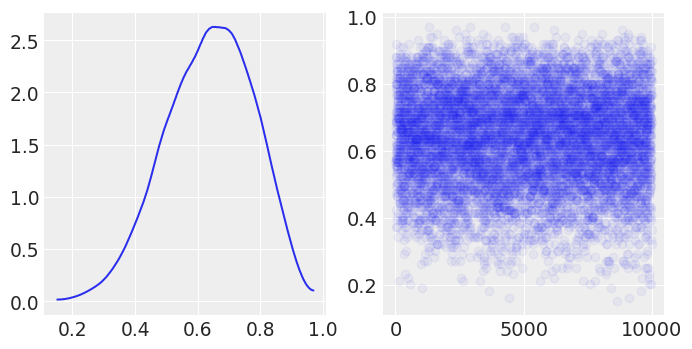

In [48]:
_,ax = plt.subplots(1,2,figsize = (8,4))
az.plot_kde(samples, ax=ax[0])
ax[1].plot(samples, 'o', alpha = 0.05)

In [56]:
sum(prob[grid < 0.5])

0.17183313110747478

In [62]:
(sum((samples > 0.5) & (samples < 0.75))) /1e4

0.6041

In [67]:
np.percentile(samples, 80)

0.7575757575757577

In [66]:
np.percentile(samples, (10,90))

array([0.45454545, 0.81818182])

In [77]:
sum(prob * abs(0.5 - grid))

0.16407647390830632

In [90]:
grid, posterior = binom_grid_approximation(3,3,100,np.repeat(1,100))

In [91]:
sum(posterior * abs(0.5 - grid))

0.31626874808693

In [145]:
a =[sum(posterior*abs(x - grid)) for x in grid]

In [146]:
grid[a == min(a)]

array([0.84848485])

In [5]:
stats.binom.pmf([0,1,2],2,0.7)

array([0.09, 0.42, 0.49])

In [6]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([1, 0, 2, 2, 1, 1, 2, 1, 2, 1])

In [8]:
dummy_water = stats.binom.rvs(n=2, p=0.7, size=int(1e5))

In [33]:
%timeit values, counts = np.unique(dummy_water, return_counts=True)

1.3 ms ± 9.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit list(dict(zip(values, counts)).values())

1.8 µs ± 41.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [56]:
import itertools as iter

In [57]:
d = dict(zip(values, counts)).values()

In [64]:
%%timeit
list(d)


161 ns ± 0.425 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [70]:
data = stats.binom.rvs(9,p=0.7,size = int(1e5))

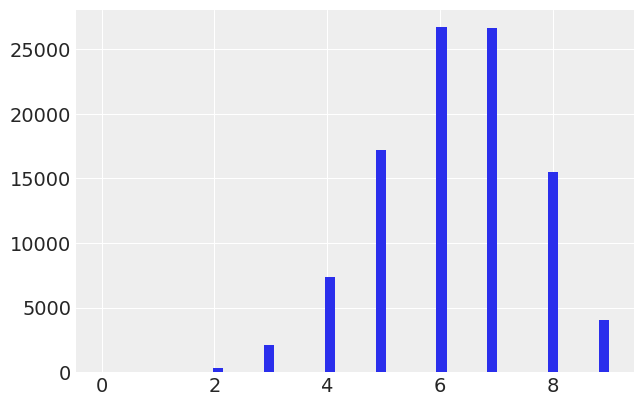

In [78]:
plt.hist(data, bins = 50);

In [185]:
grid, data = binom_grid_approximation(6,9,10000,np.repeat(1,10000))

In [186]:
samples = np.random.choice(grid,p=data, size = int(1e4), replace = True)

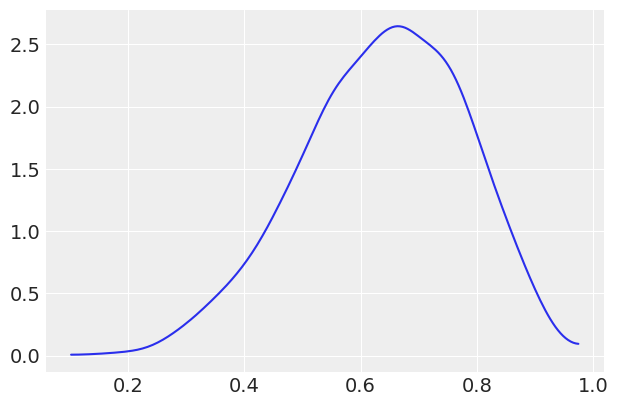

In [187]:
az.plot_kde(samples)

In [147]:
%timeit sum(samples<0.2)/1e4

17.1 ms ± 87 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [148]:
%timeit np.mean(samples<0.2) 

20.4 µs ± 60 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [149]:
np.mean(samples<0.2)

0.0009

In [150]:
np.mean(samples>0.8)

0.123

In [154]:
np.sum((samples > 0.2) & (samples < 0.8))/(1e4)

0.8761

In [158]:
np.percentile(samples, 80)

0.7618761876187619

In [193]:
pm.stats.hpd(samples,alpha = 0.44)

array([0.55385539, 0.77767777])

In [183]:
np.percentile(samples,(50-33,50+33))

array([0.49943294, 0.77659466])

In [26]:
def HDI_from_MCMC(posterior_samples, credible_mass):
    # Computes highest density interval from a sample of representative values,
    # estimated as the shortest credible interval
    # Takes Arguments posterior_samples (samples from posterior) and credible mass (normally .95)
    sorted_points = sorted(posterior_samples)
    ciIdxInc = np.ceil(credible_mass * len(sorted_points)).astype('int')
    nCIs = len(sorted_points) - ciIdxInc
    ciWidth = [0]*nCIs
    for i in range(0, nCIs):
        ciWidth[i] = sorted_points[i + ciIdxInc] - sorted_points[i]
    HDImin = sorted_points[ciWidth.index(min(ciWidth))]
    HDImax = sorted_points[ciWidth.index(min(ciWidth))+ciIdxInc]
    return(HDImin, HDImax)

In [199]:
HDI_from_MCMC(samples,0.66)

(0.5268526852685269, 0.7985798579857986)

In [16]:
def binom_grid_approx(w,n,gridsize,prior):
    grid = np.linspace(0,1,gridsize)
    probabilities = stats.binom.pmf(w,n,grid)
    output = prior*probabilities/(prior*probabilities).sum()
    return grid, output

In [41]:
grid, output = binom_grid_approx(8,15,1000,np.repeat(1,1000))

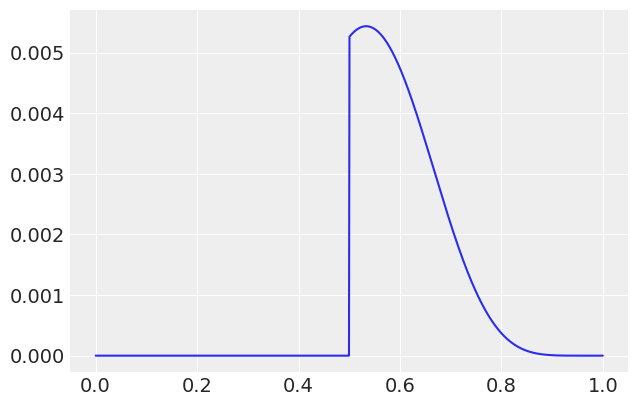

In [143]:
plt.plot(grid,output)

In [144]:
samples = np.random.choice(grid, p=output,size = int(1e4), replace = True)

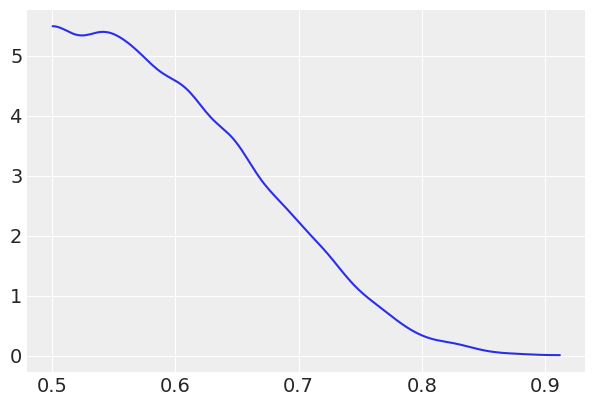

In [145]:
az.plot_kde(samples)

In [146]:
pm.stats.hpd(samples,0.1)

array([0.5005005 , 0.71271271])

In [147]:
a,b =HDI_from_MCMC(samples,0.9)

In [148]:
np.sum((samples>=a) & (samples <= b))/1e4

0.9009

In [151]:
np.sum(w==8)/1e4

0.1528

In [192]:
grid, output = binom_grid_approx(8,15,1000,np.repeat(1,1000))

In [193]:
samples = np.random.choice(grid, size=int(1e4), p=output)

In [208]:
w = stats.binom.rvs(15, p=samples)

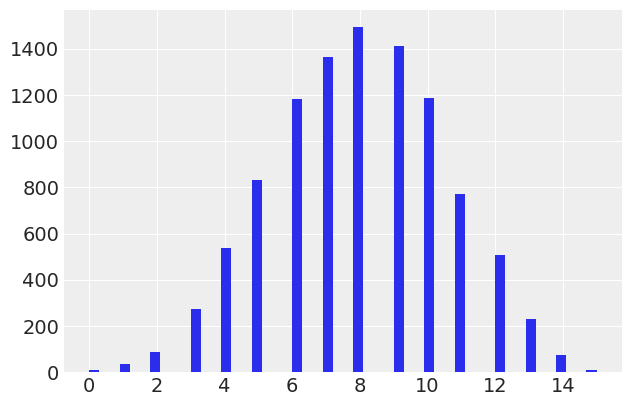

In [209]:
plt.hist(w,bins = 50);

In [210]:
np.sum(w==8)/1e4

0.1494

In [211]:
grid, output = binom_grid_approx(8,15,1000,np.repeat((0,1), (500,500)))

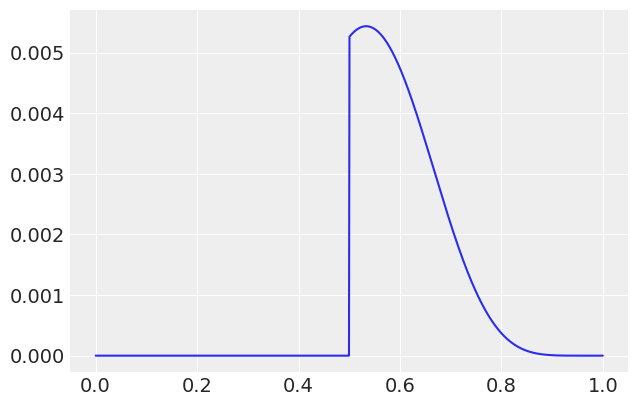

In [212]:
plt.plot(grid,output)

In [213]:
samples2 = np.random.choice(grid,size=int(1e4), p=output, replace=True)

In [214]:
w2 = stats.binom.rvs(15,p=samples2)

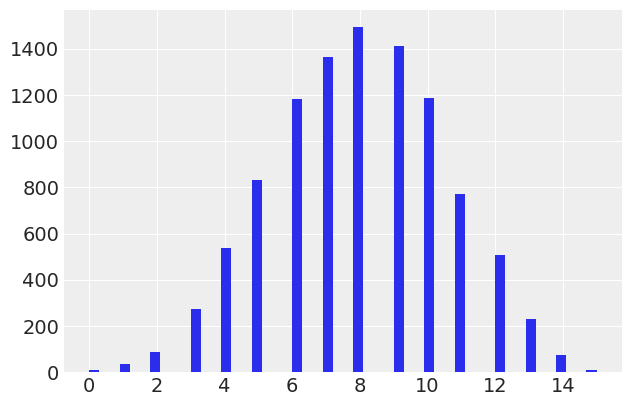

In [215]:
plt.hist(w, bins = 50);

In [216]:
np.sum(w2==8)/1e4

0.1516

In [217]:
w3 = stats.binom.rvs(15, p = np.repeat(0.7,1e4))

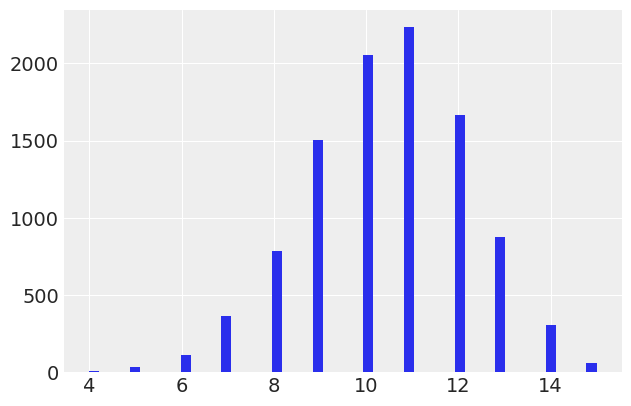

In [218]:
plt.hist(w3,bins = 50);

In [219]:
np.sum(w3==8)/1e4

0.0782

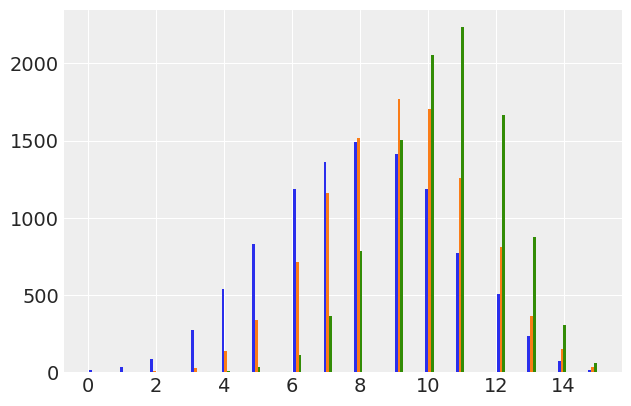

In [220]:
plt.hist([w,w2,w3], bins = 50);

In [221]:
birth1 =np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0, 1,0,1,1,1,0,1,1,1,1])

In [223]:
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0, 1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1, 0,0,0,1,1,1,0,0,0,0])

In [228]:
allbirths=np.concatenate((birth1,birth2))

In [303]:
n = len(allbirths)

In [304]:
w = sum(allbirths)

In [305]:
grid, posterior = binom_grid_approx(w, n, 1000, np.repeat(1,1000))

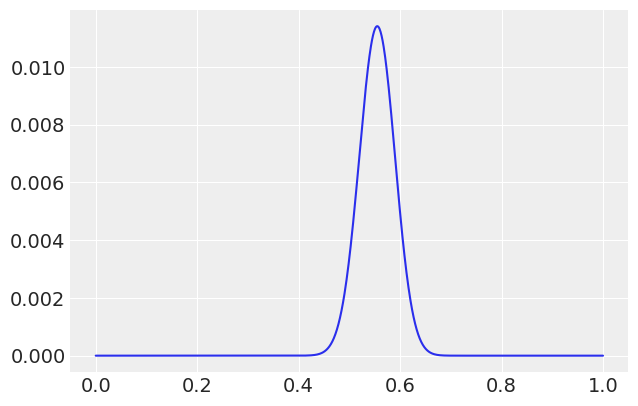

In [241]:
plt.plot(grid,posterior)

In [248]:
samples = np.random.choice(grid,size=int(1e5), p=posterior, replace=True)

In [249]:
np.percentile(samples, 50)

0.5545545545545546

In [250]:
grid[posterior == max(posterior)]

array([0.55455455])

In [258]:
pm.stats.hpd(samples,1-0.97)

array([0.47747748, 0.62762763])

In [259]:
pm.stats.hpd(samples,1-0.89)

array([0.4964965 , 0.60760761])

In [260]:
pm.stats.hpd(samples,1-0.5)

array([0.53253253, 0.57857858])

In [262]:
w = stats.binom.rvs(200, p=samples)

In [288]:
w2 = stats.binom.rvs(200, p=np.repeat(111/200,1e5))

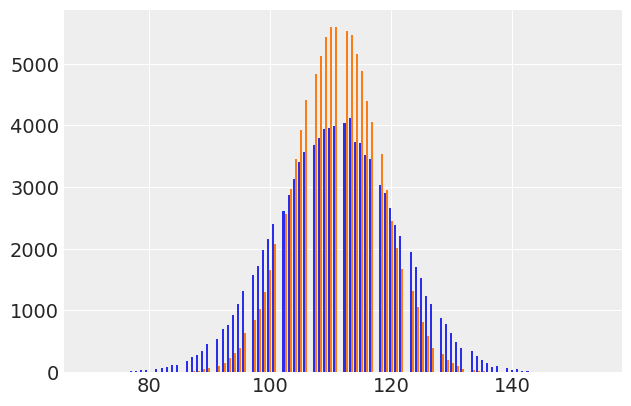

In [290]:
plt.hist([w,w2], bins=100);

In [292]:
birthgirlfirst = birth2[birth1 == 0]

In [312]:
w = np.sum(birthgirlfirst)

In [313]:
n = len(birthgirlfirst)

In [314]:
grid2, posterior2 = binom_grid_approx(w,n,1000,np.repeat(1,1000))

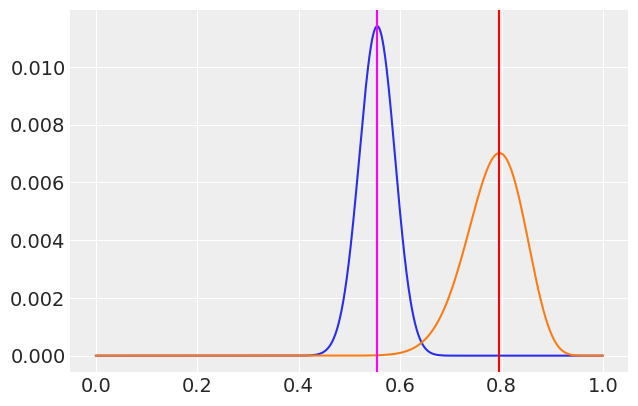

In [324]:
plt.plot(grid,posterior);
plt.plot(grid2,posterior2);
plt.axvline(grid2[posterior2 == max(posterior2)], color = 'red')
plt.axvline(grid[posterior == max(posterior)], color = 'magenta')
plt.show()